# Problem 6.8

### Initialization

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

##### First order system:

The first system is a first-order system that is defined via the transfer function model.
The model is:
$$
H_1(s) = \frac{1}{s+1}
$$
A Bode-plot is generated to analyse the frequency response.

Define the first-order transfer function and the cascade of three first-order ones.
The transfer function of the cascaded system is:
$$
H_3(s) = \frac{1}{s^3 + 3 s^2 + 3 s + 1}
$$

In [2]:
sys1 = signal.TransferFunction([1], [1, 1])
sys3 = signal.TransferFunction([1],[1, 3, 3, 1])

In [3]:
zpk1 = signal.tf2zpk([1], [1, 1])
zpk3 = signal.tf2zpk([1], [1, 3, 3, 1])
print('poles of system 1 are: ', zpk1[1])
print('zeros of system 1 are: ', zpk1[0])
print('poles of system 2 are: ', zpk3[1])
print('zeros of system 2 are: ', zpk3[0])

poles of system 1 are:  [-1.]
zeros of system 1 are:  []
poles of system 2 are:  [-0.99999672+5.68937417e-06j -0.99999672-5.68937417e-06j
 -1.00000657+0.00000000e+00j]
zeros of system 2 are:  []


In [4]:
w1, mag1, phase1 = sys1.bode()
w3, mag3, phase3 = sys3.bode()

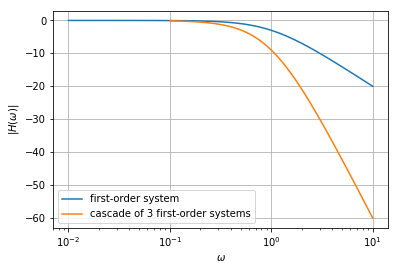

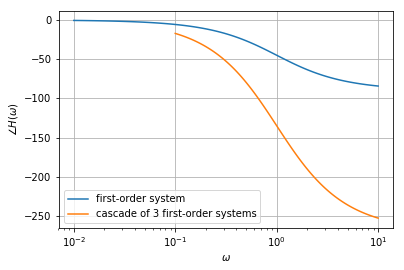

In [5]:
plt.figure()
plt.semilogx(w1, mag1, label = 'first-order system')    # Bode magnitude plot system 1
plt.semilogx(w3, mag3, label = 'cascade of 3 first-order systems')    # Bode magnitude plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.legend()
plt.grid(True)
plt.figure()
plt.semilogx(w1, phase1, label = 'first-order system')  # Bode phase plot system 1
plt.semilogx(w3, phase3, label = 'cascade of 3 first-order systems')  # Bode phase plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()

#### Calculate the step response of the two systems

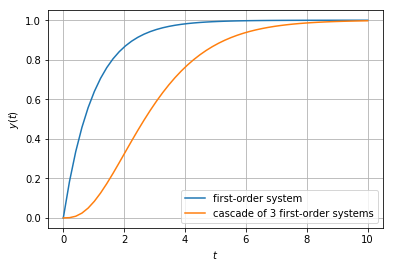

In [6]:
t1 = np.linspace(0, 10)
u1 = np.ones_like(t1)
tout1, y1, x1 = signal.lsim(sys1, u1, t1)
plt.plot(t1, y1, label = 'first-order system')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.grid(True)
tout3, y3, x3 = signal.lsim(sys3, u1, t1)
plt.plot(tout3,y3, label = 'cascade of 3 first-order systems')
plt.legend()
plt.grid(True)
plt.show()

Define the value for the gain $k$ for later calculations and the closed-loop transfer function:
$$
H_{cl}(s) = \frac{k}{s^3 + 3 s^2 + 3 s + 1 + k}
$$

In [7]:
k=2
syscl = signal.TransferFunction([k],[1,3,3,1+k])
wcl, magcl, phasecl = syscl.bode()

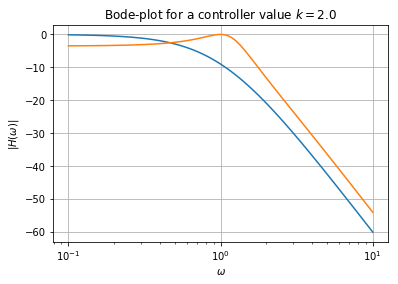

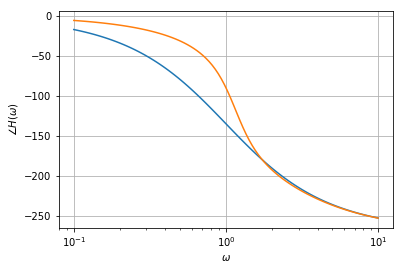

In [8]:
plt.figure()
plt.semilogx(w3, mag3, label = 'first-order system')    # Bode magnitude plot system 1
plt.semilogx(wcl, magcl, label = 'cascade of 3 first-order systems')    # Bode magnitude plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.title(r'Bode-plot for a controller value $k =$%1.1f' %k )
plt.grid(True)
plt.figure()
plt.semilogx(w3, phase3, label = 'first-order system')  # Bode phase plot system 1
plt.semilogx(wcl, phasecl, label = 'cascade of 3 first-order systems')  # Bode phase plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.grid(True)
plt.show()

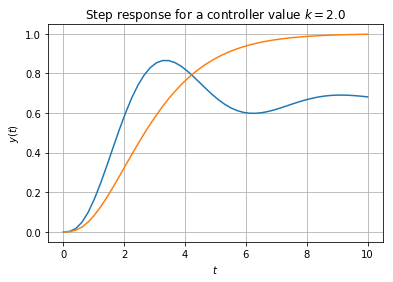

In [9]:
tcl = np.linspace(0, 10)
ucl = np.ones_like(tcl)
toutcl, ycl, xcl = signal.lsim(syscl, ucl, tcl)
plt.plot(tcl, ycl, label = 'first-order system')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title(r'Step response for a controller value $k =$%1.1f' %k )
plt.grid(True)
tout3, y3, x3 = signal.lsim(sys3, ucl, tcl)
plt.plot(tout3,y3, label = 'cascade of 3 first-order systems')
plt.grid(True)
plt.show()